# **Punto 4: Escenario en el sector real**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import time


In [ ]:
# Posiciones (nodos = servidores de streaming)
pos = {
    "Servidor_A": (0, 0),
    "Servidor_B": (2, 2),
    "Servidor_C": (4, 0),
    "Servidor_D": (6, 2),
    "Servidor_E": (8, 0)
}
nx.set_node_attributes(G, pos, "coord")



In [ ]:
print(G.nodes(data=True))


[('Servidor_A', {'coord': (0, 0)}), ('Servidor_B', {'coord': (2, 2)}), ('Servidor_C', {'coord': (4, 0)}), ('Servidor_D', {'coord': (6, 2)}), ('Servidor_E', {'coord': (8, 0)})]


In [ ]:
# Heurística adaptada al atributo elegido
def heuristic(u, v, metric="latencia"):
    (x1, y1) = G.nodes[u]["coord"]
    (x2, y2) = G.nodes[v]["coord"]
    dist = ((x1 - x2)**2 + (y1 - y2)**2) ** 0.5

    if metric == "latencia":
        return dist * 10
    elif metric == "costo":
        return dist * 2
    elif metric == "energia":
        return dist * 3
    elif metric == "confiabilidad":
        return 100 - dist  # como queremos maximizar confiabilidad
    return dist


In [ ]:
def bfs(start, goal):
    visited = []
    queue = [[start]]
    while queue:
        path = queue.pop(0)
        node = path[-1]
        if node not in visited:
            visited.append(node)
            if node == goal:
                return path, visited
            for neighbor in G.neighbors(node):
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)
    return None, visited


In [ ]:
def astar(start, goal, metric="latencia"):
    open_set = {start}
    came_from = {}
    g_score = {node: float("inf") for node in G.nodes}
    f_score = {node: float("inf") for node in G.nodes}
    g_score[start] = 0
    f_score[start] = heuristic(start, goal, metric)

    visited = []

    while open_set:
        current = min(open_set, key=lambda x: f_score[x])
        visited.append(current)

        if current == goal:
            # reconstrucción del camino
            path = []
            while current in came_from:
                path.insert(0, current)
                current = came_from[current]
            path.insert(0, start)
            return path, visited

        open_set.remove(current)
        for neighbor in G.neighbors(current):
            weight = G[current][neighbor][metric]
            tentative_g = g_score[current] + weight
            if tentative_g < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g
                f_score[neighbor] = tentative_g + heuristic(neighbor, goal, metric)
                open_set.add(neighbor)
    return None, visited


In [ ]:
def animate_search(path, visited, title):
    plt.figure(figsize=(8,5))
    for i, node in enumerate(visited):
        plt.clf()
        nx.draw(G, pos, with_labels=True, node_size=1000, node_color="lightgray", edgecolors="black")
        nx.draw_networkx_nodes(G, pos, nodelist=visited[:i+1], node_color="yellow")
        plt.title(f"{title} - Visitando: {node}")
        plt.pause(0.8)

    # Dibujar camino final
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color="lightblue", edgecolors="black")
    nx.draw_networkx_edges(G, pos, edgelist=list(zip(path, path[1:])), edge_color="red", width=2)
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color="green")
    plt.title(f"{title} - Camino final: {' → '.join(path)}")
    plt.show()


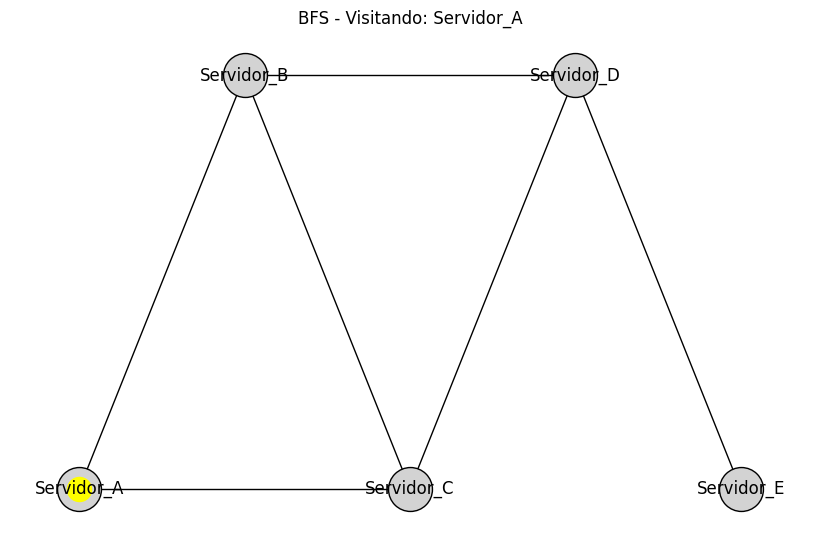

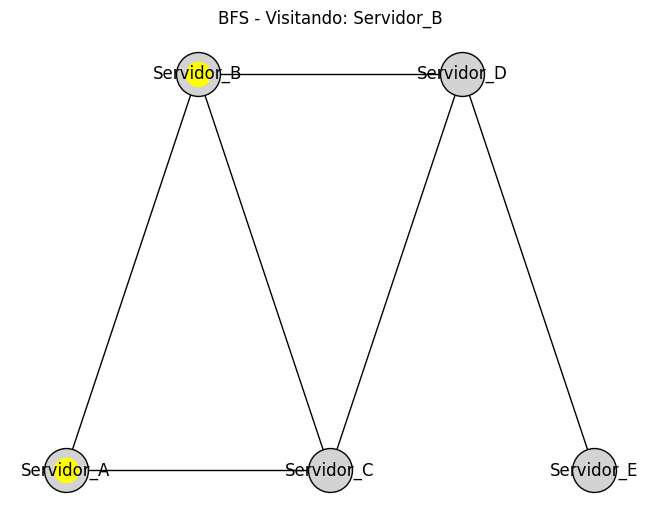

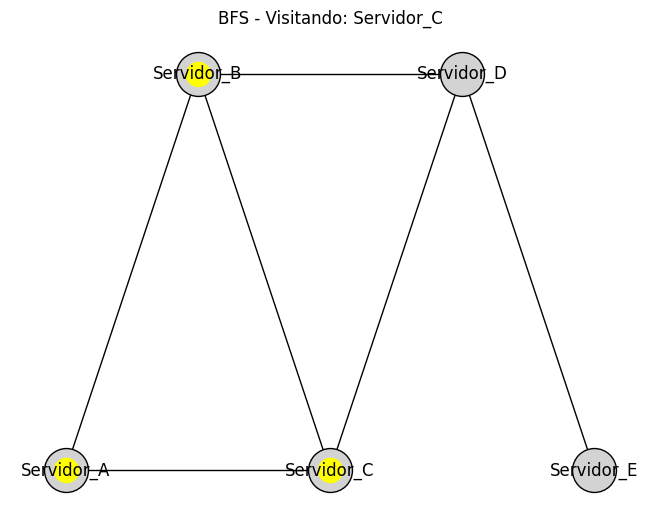

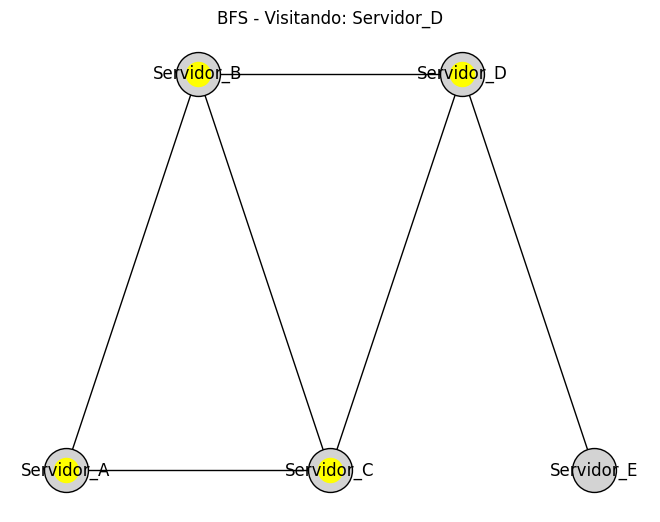

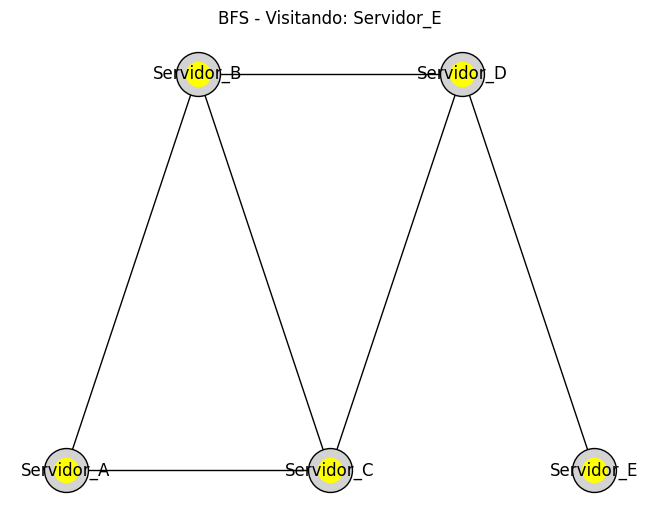

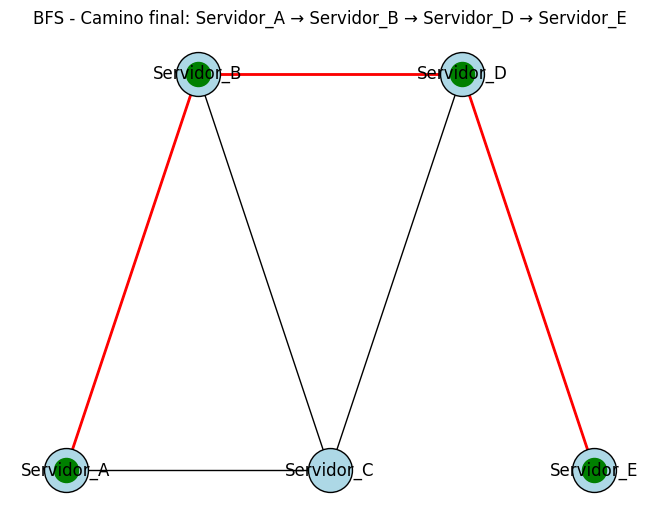

In [ ]:
# Nodo de inicio y destino
start, goal = "Servidor_A", "Servidor_E"

# BFS
path_bfs, visited_bfs = bfs(start, goal)
animate_search(path_bfs, visited_bfs, "BFS")


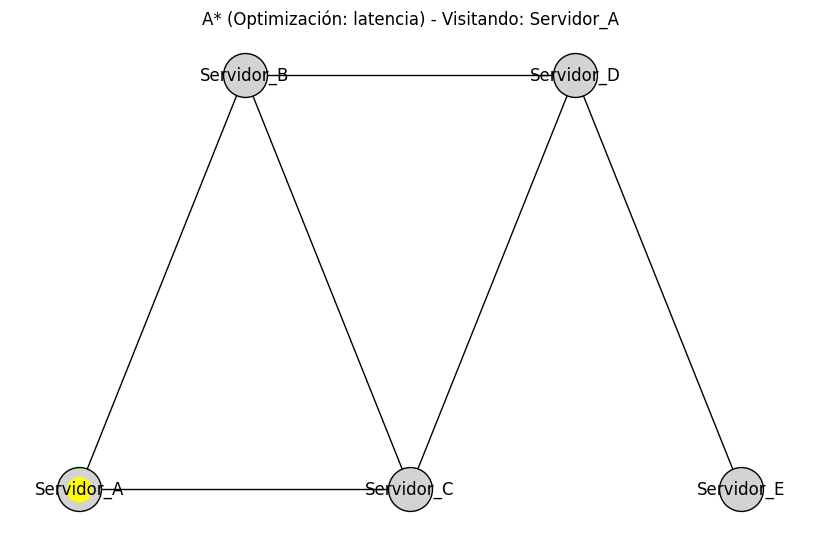

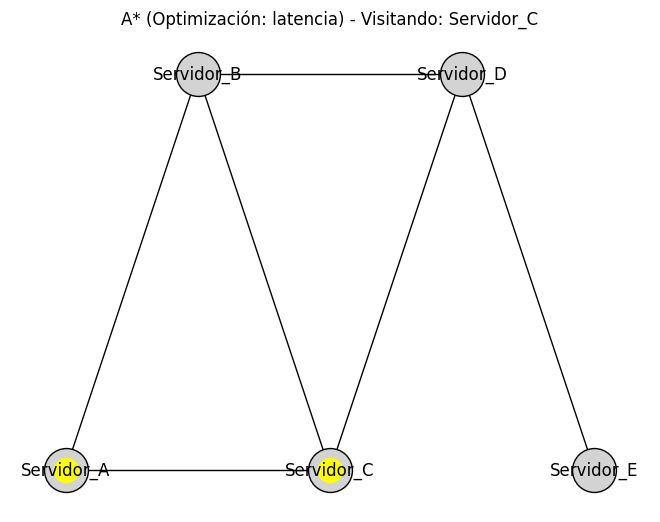

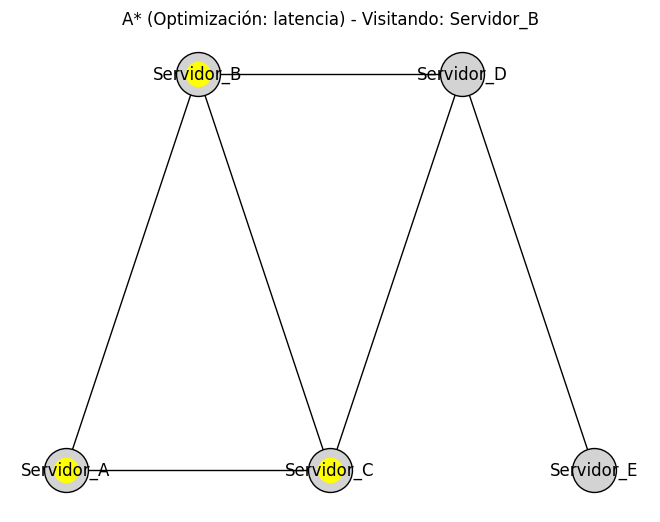

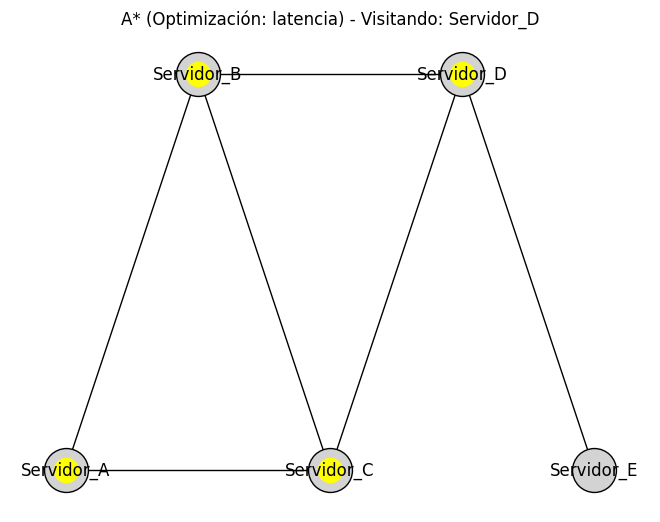

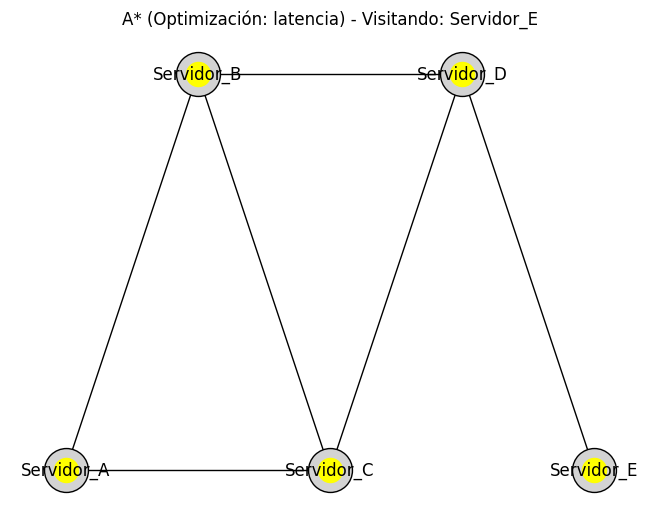

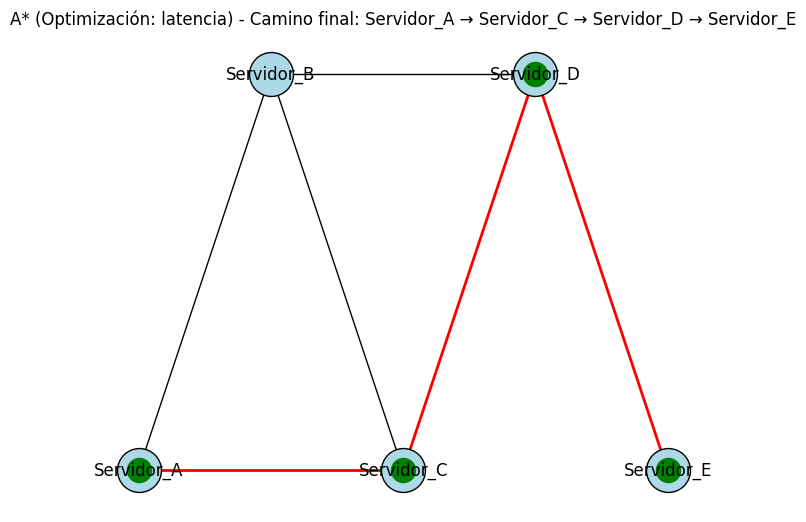

In [ ]:
# A* optimizando por latencia
path_astar, visited_astar = astar(start, goal, metric="latencia")
animate_search(path_astar, visited_astar, "A* (Optimización: latencia)")

# Análisis y Comparativa entre los resultados BFS y A*

- BFS garantiza el camino con menor número de saltos entre servidores, sin tener en cuenta los costos asociados a cada enlace.
- En contraste, A* combina el costo recorrido con una heurística de latencia, lo que le permite seleccionar la ruta que, aunque pueda involucrar diferentes nodos, resulta más eficiente en términos de tiempo de transmisión. Esto demuestra que, en un contexto como el sector entretenimiento, donde
- la calidad del servicio y la reducción de la latencia son prioritarias, A* ofrece una solución más adecuada que BFS.